In [7]:
import pandas as pd
import seaborn as sns
import tensorflow
import cv2
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,VGG16,VGG19
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG, load_img
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D,BatchNormalization,GlobalAveragePooling2D,MaxPooling2D
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img_size=224
img_size_dim=[224,224]
dimension=(img_size,img_size)
zoom=[0.99,1.01]
bright=[0.8,1.2]
fill_mode='constant'
data_format='channels_last'
dir='/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone'
data_gen=IDG(rescale=1./255,brightness_range=bright,zoom_range=zoom,data_format=data_format,fill_mode=fill_mode,horizontal_flip=True)
train_data_gen=data_gen.flow_from_directory(directory=dir,target_size=dimension,batch_size=32,shuffle=False)

Found 12446 images belonging to 1 classes.


In [9]:
for i in range(32):
    train_data, train_labels = next(train_data_gen)
    print(train_data.shape, train_labels.shape)


(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)
(32, 224, 224, 3) (32, 1)


In [10]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(train_data,train_labels,test_size=0.2,random_state=47)
train_data,val_data,train_labels,val_labels = train_test_split(train_data,train_labels,test_size=0.2,random_state=47)

In [11]:
import os
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

# Define the path to the VGG16 weights directory in your Kaggle working directory
weights_path = "/kaggle/input/vgg16"

# Load the VGG16 model with ImageNet weights, excluding the top layers
base_model = VGG16(weights=os.path.join(weights_path, 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'), include_top=False, input_shape=(224, 224, 3))

# Build your custom classification layers on top of the VGG16 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Print a summary of the model architecture
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 14,847,044 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import tensorflow as tf

# Assuming train_labels and val_labels are your target labels
# Convert the target labels to one-hot encoded format
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=4)
val_labels_one_hot = tf.keras.utils.to_categorical(val_labels, num_classes=4)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
model.fit(train_data, train_labels_one_hot, batch_size=32, epochs=10, validation_data=(val_data, val_labels_one_hot))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.0000e+00 - loss: 1.8796 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 1.0000 - loss: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 1.0000 - loss: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 1.0000 - loss: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 1.0000 - loss: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - val_ac

In [13]:
model.save("vgg.keras")

In [14]:
import os
from keras.applications import VGG19
from keras.layers import Flatten, Dense, BatchNormalization, Dropout
from keras.models import Model

# Define the path to the VGG19 weights directory in your Kaggle working directory
weights_path = "/kaggle/input/vgg19"

# Load the VGG19 model with ImageNet weights, including the top layers
base_model = VGG19(weights=os.path.join(weights_path, 'vgg19_weights_tf_dim_ordering_tf_kernels.h5'))

# Load the pretrained VGG19 model with the weights from the local file
pretrained_model = VGG19(include_top=False, input_shape=(224, 224, 3), pooling='max', weights=os.path.join(weights_path, 'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'))

# Freeze the weights of the pretrained model
pretrained_model.trainable = False

# Get the output tensor of the pretrained model
x = pretrained_model.output

# Add custom layers on top of the pretrained model
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=pretrained_model.input, outputs=x)

# Display the model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,291,140 (77.40 MB)

 Trainable params: 265,732 (1.01 MB)

 Non-trainable params: 20,025,408 (76.39 MB)

In [15]:
import tensorflow as tf

# Assuming train_labels and val_labels are your target labels
# Convert the target labels to one-hot encoded format
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=4)
val_labels_one_hot = tf.keras.utils.to_categorical(val_labels, num_classes=4)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
model.fit(train_data, train_labels_one_hot, batch_size=32, epochs=10, validation_data=(val_data, val_labels_one_hot))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.1500 - loss: 2.1419 - precision_1: 0.0769 - recall_1: 0.0500 - val_accuracy: 1.0000 - val_loss: 0.7995 - val_precision_1: 1.0000 - val_recall_1: 0.2000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4500 - loss: 1.4502 - precision_1: 0.3333 - recall_1: 0.1500 - val_accuracy: 1.0000 - val_loss: 0.8006 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2000 - loss: 2.2278 - precision_1: 0.1875 - recall_1: 0.1500 - val_accuracy: 1.0000 - val_loss: 0.8840 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3000 - loss: 1.7375 - precision_1: 0.3333 - recall_1: 0.1500 - val_accuracy: 1.0000 - val_loss: 0.9262 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3000 - loss: 2.1559 - precision_1: 0.2000 - recall_1: 0.1

In [16]:
model.save("new_vgg19.keras")

In [18]:
import tensorflow as tf
from keras.models import load_model

# Load the model
test = load_model("/kaggle/working/new_vgg19.keras", compile=False)
from keras.models import load_model

# Specify the correct file path
model_file_path = "/kaggle/working/new_vgg19.keras"

# Load the model
test = load_model(model_file_path, compile=False)


In [19]:
test.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,291,140 (77.40 MB)

 Trainable params: 20,290,116 (77.40 MB)

 Non-trainable params: 1,024 (4.00 KB)

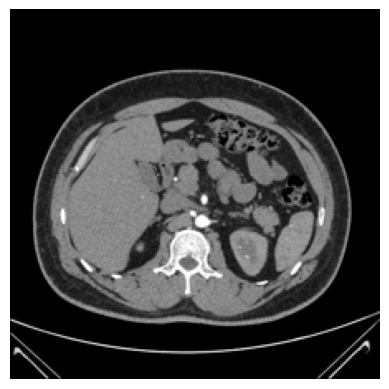

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open(r"/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (10).jpg")

# Resize the image
img_resized = img.resize((224, 224))

# Display the resized image
plt.imshow(img_resized)
plt.axis('off')  # Turn off axis
plt.show()


In [21]:
from PIL import Image
import numpy as np
from keras.preprocessing.image import img_to_array

# Load the image
img = Image.open(r"/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (10).jpg")

# Convert the image to a NumPy array
x = img_to_array(img)

# Expand the dimensions to create a batch of size 1
x = np.expand_dims(x, axis=0)


In [22]:
from PIL import Image
import numpy as np
from keras.preprocessing.image import img_to_array

# Load the image
img = Image.open("/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (10).jpg")

# Resize the image to match the model's input shape
img_resized = img.resize((224, 224))

# Convert the resized image to a NumPy array
x = img_to_array(img_resized)

# Expand the dimensions to create a batch of size 1
x = np.expand_dims(x, axis=0)

# Print the index of the predicted class
print(np.argmax(test.predict(x), axis=1)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
2


In [23]:
class GradCAM:
    def __init__(self, model, layer_name):
        self.model = model
        self.layer_name = layer_name
        self.grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    def generate(self, image_array, class_idx):
        with tf.GradientTape() as tape:
            conv_outputs, predictions = self.grad_model(image_array)
            loss = predictions[:, class_idx]

        output = conv_outputs[0]
        grads = tape.gradient(loss, conv_outputs)[0]

        guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

        weights = tf.reduce_mean(guided_grads, axis=(0, 1))

        cam = tf.reduce_sum(tf.multiply(weights, output), axis=-1)
        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (image_array.shape[2], image_array.shape[1]))
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)
        return cam

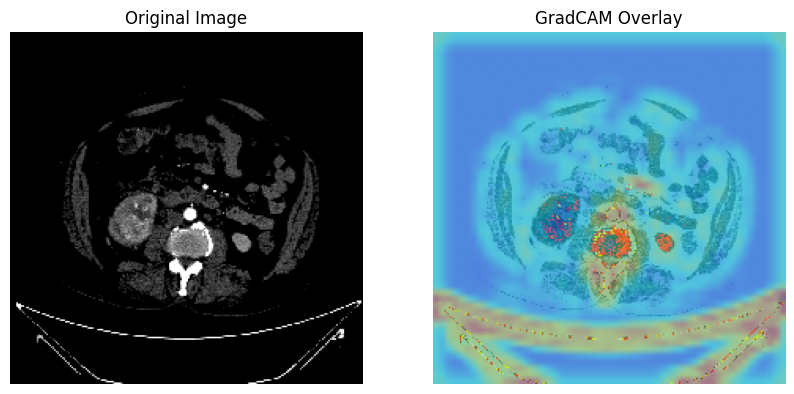

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow GPU-related messages

import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

class GradCAM:
    def __init__(self, model, layer_name):
        self.model = model
        self.layer_name = layer_name
        self.grad_model = tf.keras.models.Model(inputs=[model.input], 
                                                outputs=[model.get_layer(layer_name).output, model.output])
        
    def generate_heatmap(self, img_array):
        with tf.GradientTape() as tape:
            conv_outputs, predictions = self.grad_model(img_array)
            loss = predictions[:, np.argmax(predictions[0])]
        
        output = conv_outputs[0]
        grads = tape.gradient(loss, conv_outputs)[0]
        
        guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

        weights = tf.reduce_mean(guided_grads, axis=(0, 1))

        cam = tf.reduce_sum(tf.multiply(weights, output), axis=-1)
        cam = np.maximum(cam, 0)
        cam = cam / np.max(cam)
        
        return cam
    
    def overlay_heatmap(self, cam, img_array, alpha=0.5):
        heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
        img_array = np.uint8(255 * img_array[0])
        heatmap = cv2.resize(heatmap, (img_array.shape[1], img_array.shape[0]))
        
        superimposed_img = heatmap * alpha + img_array
        superimposed_img = superimposed_img / np.max(superimposed_img)
        
        return superimposed_img

# Load VGG16 model
vgg_model = VGG16(include_top=True, weights=None)  # Load the model without pre-trained weights

# Load pre-trained weights from the uploaded file
vgg_model.load_weights("/kaggle/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5")

# Load and preprocess image
img_path = "/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1).jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Initialize GradCAM
gradcam = GradCAM(vgg_model, 'block3_conv1')

# Generate GradCAM heatmap
cam = gradcam.generate_heatmap(x)

# Overlay heatmap on the original image
overlay_img = gradcam.overlay_heatmap(cam, x)

# Plot the original image and overlay image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(overlay_img)
plt.title('GradCAM Overlay')
plt.axis('off')

plt.show()


In [26]:
def guided_relu(x):
    def grad(dy):
        return tf.cast(dy > 0, "float32") * tf.cast(x > 0, "float32") * dy
    return tf.nn.relu(x), grad

In [28]:
test=load_model("/kaggle/working/new_vgg19.keras")
for layer in test.layers:
    if isinstance(layer, tf.keras.layers.ReLU):
        layer.activation = guided_relu

In [77]:
import tensorflow as tf

def get_gradcam(input_model, image, layer_name):
    # Expand the image dimensions to match the model's input shape
    image=tf.squeeze(image)
    image = tf.expand_dims(image, axis=0)
    
    # Reshape the image to have shape (None, 224, 224, 3)
    image = tf.image.resize(image, (224, 224))
    
    # Get the output tensor of the specified layer
    conv_output = input_model.get_layer(layer_name).output
    
    # Create a gradient model with the specified input and output layers
    grad_model = tf.keras.models.Model(inputs=input_model.input, outputs=conv_output)
    
    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Forward pass through the model
        conv_output = grad_model(image)
    
    return conv_output, None



def guided_grad_cam(input_model, image, layer_name):
    guided_grads, class_idx = get_gradcam(input_model, image, layer_name)
    cam = tf.reduce_sum(guided_grads, axis=-1)
    return cam, class_idx


In [78]:
from PIL import Image
img = Image.open(r"/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (10).jpg")  # Load your example image here
img=img.resize((224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


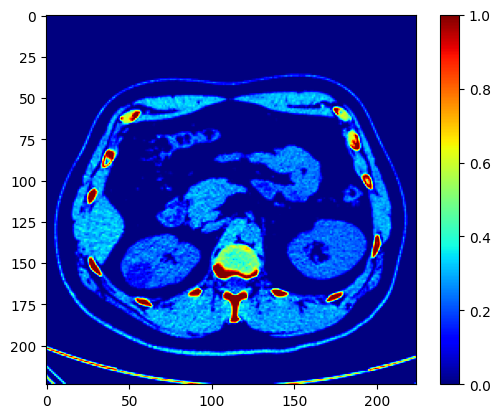

In [81]:
# Assuming cam is the heatmap generated by guided Grad-CAM
# You may need to adjust the heatmap to match the shape of the input image
# Resize the heatmap to match the shape of the input image
cam_resized = tf.image.resize(cam, (224, 224))

# Normalize the heatmap to the range [0, 1]
cam_normalized = (cam_resized - tf.reduce_min(cam_resized)) / (tf.reduce_max(cam_resized) - tf.reduce_min(cam_resized))

# Convert the heatmap to a NumPy array
cam_numpy = cam_normalized.numpy()

# Display the heatmap
plt.imshow(cam_numpy[0], cmap='jet')  # Assuming cam_numpy is of shape (1, 224, 224)
plt.colorbar()  # Add a colorbar to indicate intensity
plt.show()


In [82]:
def smoothgrad(input_model, image, n=50, stdev=0.1):
    smoothgrads = []
    for _ in range(n):
        noise = np.random.normal(0, stdev, image.shape)
        noisy_image = image + noise
        gradients = tf.GradientTape(input_model.output, input_model.input, noisy_image)
        smoothgrads.append(gradients)
    smoothgrads = np.mean(smoothgrads, axis=0)
    return smoothgrads


In [96]:
def create_occlusion_map(model, image, patch_size, stride):
    occlusion_map = np.zeros((image.shape[1], image.shape[2]))

    for i in range(0, image.shape[1] - patch_size, stride):
        for j in range(0, image.shape[2] - patch_size, stride):
            input_image = image.copy()
            input_image[:, i:i+patch_size, j:j+patch_size, :] = 0  # Occlude the patch

            prediction = model.predict(input_image)
            prob = tf.nn.softmax(prediction, axis=-1)
            top_prob = np.max(prob[0])

            occlusion_map[i:i+patch_size, j:j+patch_size] = top_prob

    return occlusion_map


In [97]:
patch_size = 60  # Size of the occlusion patch
stride = 20  # Stride for the occlusion patch
occlusion_map = create_occlusion_map(test, x, patch_size, stride)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

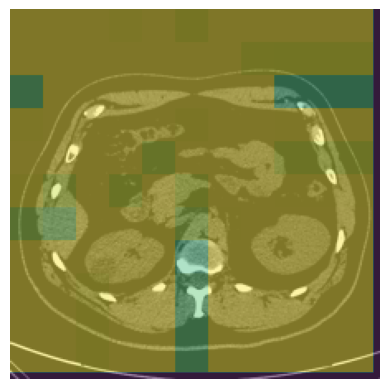

In [98]:
plt.imshow(occlusion_map, cmap='viridis', alpha=0.8)
plt.imshow(img, alpha=0.5)
plt.axis('off')
plt.show()